In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
df = pd.read_csv("Rating_Predicts.csv")

In [27]:
df.head()

,Unnamed: 0,Ratings,Review
0,0,5.0,This is the best laptop in this range.I reciev...
1,1,5.0,Good product as used of now.... Everything is ...
2,2,5.0,AWESOME LAPTOP. It supports many high spec gam...
3,3,4.0,For the peoples who R going to buy R they buye...
4,4,5.0,It's good gameing laptop in this price\nDispla...


# Exploratory Data Analysis (EDA):

In [28]:
df.shape

(21088, 3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21088 entries, 0 to 21087
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21088 non-null  int64  
 1   Ratings     21088 non-null  float64
 2   Review      20997 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 494.4+ KB


In [30]:
#checking for null values
df.isnull().sum()

Unnamed: 0     0
Ratings        0
Review        91
dtype: int64

In [31]:
#dropping unwanted columns
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [32]:
df.head()

,Ratings,Review
0,5.0,This is the best laptop in this range.I reciev...
1,5.0,Good product as used of now.... Everything is ...
2,5.0,AWESOME LAPTOP. It supports many high spec gam...
3,4.0,For the peoples who R going to buy R they buye...
4,5.0,It's good gameing laptop in this price\nDispla...


In [33]:
df.describe()

,Ratings
count,21088.000000
mean,3.309513
std,1.669336
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


### Checking for blank spaces, random characters in each column

In [34]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]

In [35]:
for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in Ratings =  0
? in Ratings =  0
- in Ratings =  0
 ? in Ratings =  0
 - in Ratings =  0
?  in Ratings =  0
-  in Ratings =  0
 ?  in Ratings =  0
 -  in Ratings =  0
NA in Ratings =  0
N/A in Ratings =  0
 NA in Ratings =  0
 N/A in Ratings =  0
  in Review =  0
? in Review =  0
- in Review =  0
 ? in Review =  0
 - in Review =  0
?  in Review =  0
-  in Review =  0
 ?  in Review =  0
 -  in Review =  0
NA in Review =  0
N/A in Review =  0
 NA in Review =  0
 N/A in Review =  0


In [37]:
df[df['Review'].isnull()].index

Int64Index([12863, 12909, 13475, 13519, 13526, 13572, 13573, 13778, 13779,
            13798, 13803, 13808, 13863, 15575, 16346, 16686, 16714, 16774,
            16873, 16894, 16954, 16957, 17055, 17063, 17069, 17134, 17137,
            17140, 17141, 17142, 17241, 17270, 17286, 17333, 17342, 17475,
            17555, 17563, 17647, 17648, 17649, 17650, 17736, 17825, 17826,
            17827, 17832, 17925, 17926, 17927, 17932, 17933, 17934, 17935,
            18015, 18026, 18027, 18028, 18029, 18030, 18031, 18032, 18033,
            18034, 18035, 18036, 18037, 18038, 18039, 18040, 18042, 18043,
            18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053,
            18054, 18056, 18057, 18087, 19640, 19769, 20820, 20821, 20823,
            20824],
           dtype='int64')

In [38]:
for c in df.drop(columns = ['Review'],axis=1):
        print(df[c].value_counts())

5.0    8254
1.0    5685
4.0    3208
3.0    2122
2.0    1819
Name: Ratings, dtype: int64


In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

Ratings    0
Review     0
dtype: int64

In [41]:
df.shape

(20997, 2)

In [44]:
df['Ratings'].unique()

array([5., 4., 1., 3., 2.])

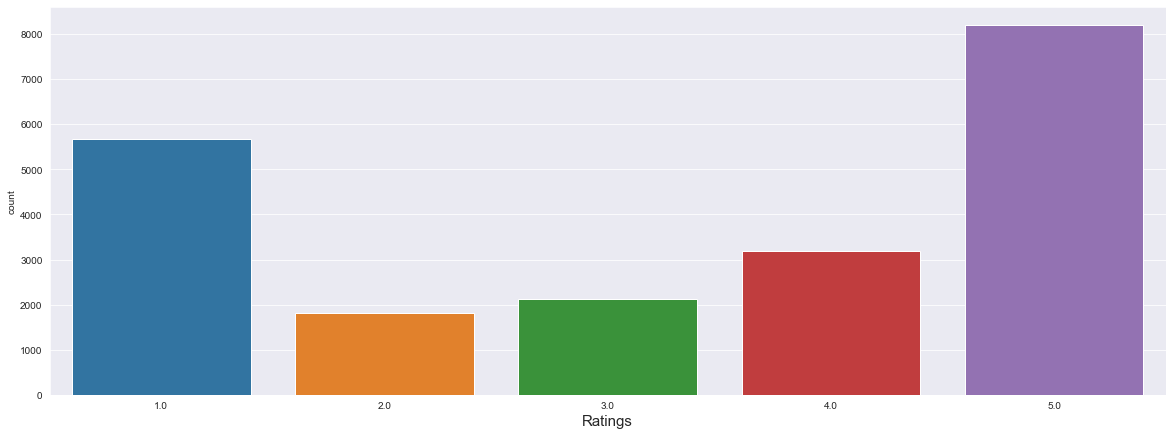

In [46]:
plt.figure(figsize=(20,50),facecolor='white')
plotnum=1
for col in df.drop(columns = ['Review'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [49]:
df['Stringlength'] = df['Review'].str.len()

In [50]:
df.head()

,Ratings,Review,Stringlength
0,5.0,This is the best laptop in this range.I reciev...,500
1,5.0,Good product as used of now.... Everything is ...,271
2,5.0,AWESOME LAPTOP. It supports many high spec gam...,96
3,4.0,For the peoples who R going to buy R they buye...,500
4,5.0,It's good gameing laptop in this price\nDispla...,100


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

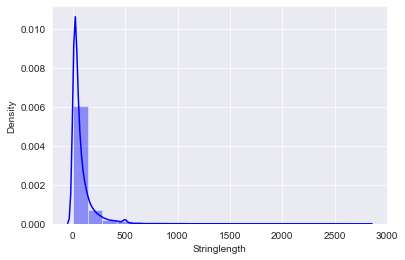

In [51]:
sns.distplot(df.Stringlength, bins=20, color = 'blue')

most reviews are between 0 and 500 words

# Data Pre Processing

In [52]:
import re
import string

In [54]:
# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [55]:
# Convert all messages to lower case
df['Review'] = df['Review'].str.lower()

In [56]:
# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [57]:
# Replace money symbols with 'moneysymb'
df['Review'] = df['Review'].str.replace(r'£|\$', 'dollars')

In [58]:
# Replacing 10 digit phone numbers with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [59]:
# Replace numbers with 'num'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?','num')

In [60]:
#removing punctuations
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]',' ') 

In [61]:
#removing underscore characters
df['Review'] = df['Review'].str.replace(r'[\_]',' ')

In [62]:
#removing single characters
df['Review'] = df['Review'].str.replace(r'\s+[a-zA-Z]\s+', ' ')

In [63]:
#removing leading and trailing whitespace
df['Review'] = df['Review'].str.replace(r'^\s+|\s+?$', ' ')

In [64]:
#removing whitespace between terms with a single space
df['Review'] = df['Review'].str.replace(r'\s+', ' ')

In [65]:
df

,Ratings,Review,Stringlength
0,5.0,this is the best laptop in this range recieved...,500
1,5.0,good product as used of now everything is good...,271
2,5.0,awesome laptop it supports many high spec game...,96
3,4.0,for the peoples who going to buy they buyed th...,500
4,5.0,it good gameing laptop in this price display i...,100
...,...,...,...
21083,5.0,best quality,14
21084,5.0,nice product,15
21085,1.0,worst buy ever,16
21086,4.0,thanks products,17


In [67]:
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

In [68]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])

In [69]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [70]:
lem = WordNetLemmatizer()

In [71]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [73]:
df.head()

,Ratings,Review,Stringlength
0,5.0,best laptop range recieved late delivery due b...,500
1,5.0,good product used everything good also ssd slo...,271
2,5.0,awesome laptop support many high spec game lik...,96
3,4.0,people going buy buyed product face problem nu...,500
4,5.0,good gameing laptop price display good battery...,100


In [74]:
from wordcloud import WordCloud

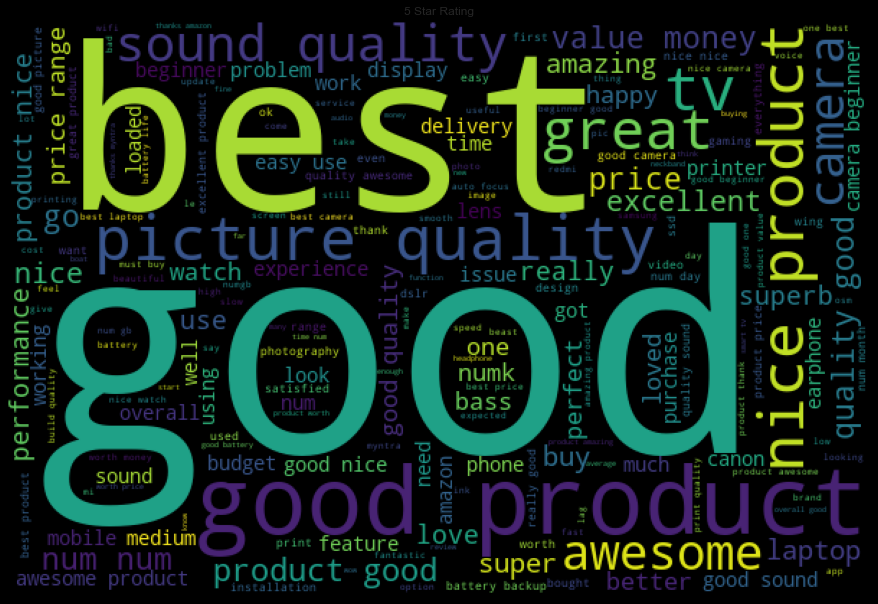

In [86]:
hams =df['Review'][df['Ratings']==5]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=200).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='5 Star Rating')
plt.tight_layout(pad=0)
plt.show()

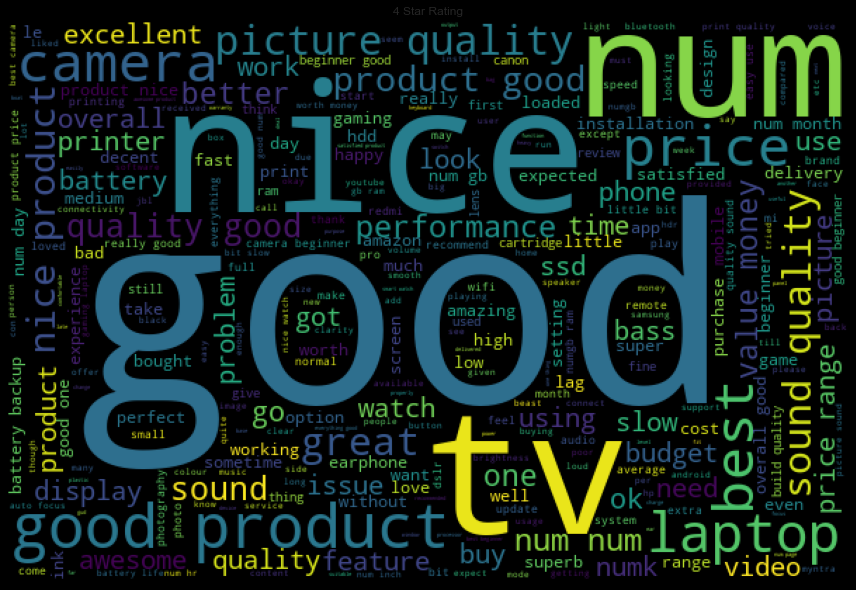

In [87]:
hams =df['Review'][df['Ratings']==4]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=300).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='4 Star Rating')
plt.tight_layout()
plt.show()

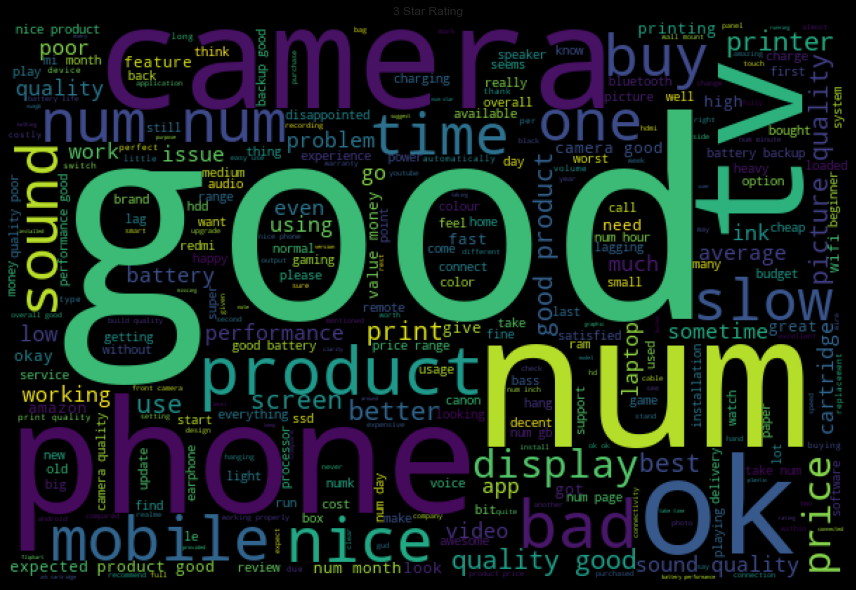

In [88]:
hams =df['Review'][df['Ratings']==3]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=300).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='3 Star Rating')
plt.tight_layout()
plt.show()

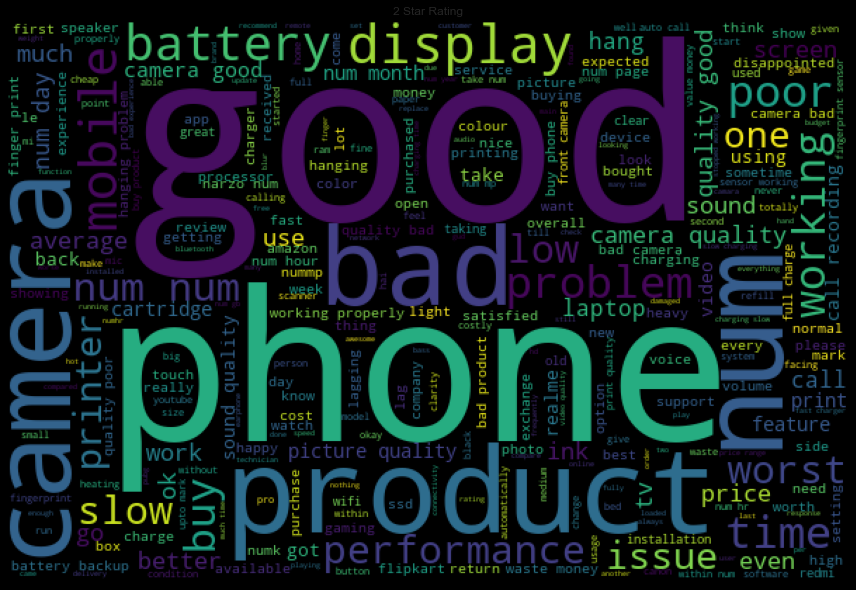

In [89]:
hams =df['Review'][df['Ratings']==2]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=300).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='2 Star Rating')
plt.tight_layout()
plt.show()

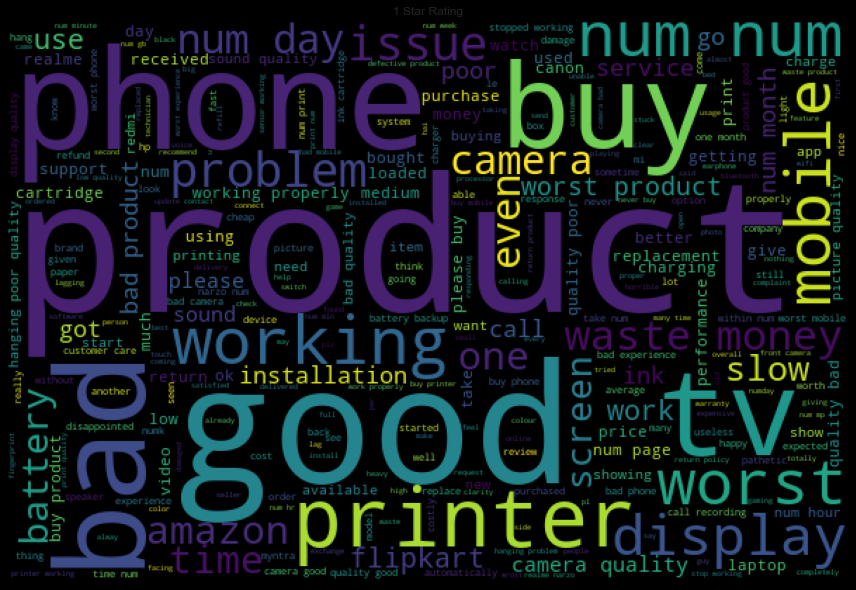

In [90]:
hams =df['Review'][df['Ratings']==1]
spam_cl = WordCloud(width = 600,height = 400,background_color='black',max_words=300).generate(' '.join(hams))
plt.figure(figsize=(12,10),facecolor = 'k')
plt.imshow(spam_cl)
plt.axis('off')
plt.title(label='1 Star Rating')
plt.tight_layout()
plt.show()

Dropping column ' 'Stringlength' since it does not contribute to model building

In [92]:
df.drop(columns=[ 'Stringlength' ],inplace = True)

In [93]:
df

,Ratings,Review
0,5.0,best laptop range recieved late delivery due b...
1,5.0,good product used everything good also ssd slo...
2,5.0,awesome laptop support many high spec game lik...
3,4.0,people going buy buyed product face problem nu...
4,5.0,good gameing laptop price display good battery...
...,...,...
21083,5.0,best quality
21084,5.0,nice product
21085,1.0,worst buy ever
21086,4.0,thanks product


In [94]:
from collections import Counter

In [97]:
five = Counter(",".join(df[df['Ratings']==5]["Review"]).split()).most_common(20)
four = Counter(",".join(df[df['Ratings']==4]["Review"]).split()).most_common(20)
three = Counter(",".join(df[df['Ratings']==3]["Review"]).split()).most_common(20)
two = Counter(",".join(df[df['Ratings']==2]["Review"]).split()).most_common(20)
one = Counter(",".join(df[df['Ratings']==1]["Review"]).split()).most_common(20)

In [98]:
#creating dataframe
top20 = pd.DataFrame()
print("TOP 20 Words and Ratings,with their counts")
top20['Five Star Words']=five
top20['Four Star Words']=four
top20['Three Star Words']=three
top20['Two Star Words']=two
top20['One Star Words']=one

TOP 20 Words and Ratings,with their counts


In [99]:
top20

,Five Star Words,Four Star Words,Three Star Words,Two Star Words,One Star Words
0,"(num, 1577)","(good, 855)","(num, 675)","(num, 617)","(num, 2102)"
1,"(good, 1457)","(num, 845)","(good, 491)","(good, 311)","(product, 1000)"
2,"(quality, 1419)","(quality, 634)","(quality, 359)","(quality, 289)","(quality, 715)"
3,"(product, 1303)","(product, 443)","(camera, 196)","(camera, 243)","(buy, 582)"
4,"(sound, 749)","(sound, 345)","(tv, 181)","(phone, 228)","(phone, 581)"
5,"(camera, 582)","(price, 265)","(product, 172)","(product, 145)","(working, 551)"
6,"(price, 559)","(tv, 247)","(time, 148)","(bad, 145)","(camera, 484)"
7,"(picture, 502)","(picture, 215)","(sound, 143)","(working, 141)","(good, 478)"
8,"(best, 499)","(camera, 201)","(phone, 135)","(battery, 134)","(bad, 461)"
9,"(tv, 452)","(laptop, 178)","(battery, 132)","(time, 132)","(time, 447)"


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfv = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [103]:
features = tfv.fit_transform(df['Review'])

# Model Building

In [104]:
X = features
y = df['Ratings']

# SMOTE Technique for balancing classess

In [108]:
from imblearn.over_sampling import SMOTE as stm

In [111]:
smt_x,smt_y = stm().fit_resample(X,y)

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB,MultinomialNB
import scikitplot as sktplt
from sklearn.model_selection import GridSearchCV

# Checking Best random state

In [115]:
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x, smt_y,test_size = .30, random_state = i)
    RF =  RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred = RF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7166314420419444 on random_state: 12


In [116]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 35)

#### RandomForestClassifier

In [117]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [118]:
rfc.score(x_train,y_train)

0.8783054036163467

In [119]:
pred_rfc = rfc.predict(x_test)

In [120]:
print('Classification Report:',classification_report(y_test, pred_rfc))
print('Confusion Matrix:',confusion_matrix(y_test,pred_rfc))

Classification Report:               precision    recall  f1-score   support

         1.0       0.79      0.76      0.77      2424
         2.0       0.80      0.81      0.80      2413
         3.0       0.65      0.73      0.69      2423
         4.0       0.62      0.67      0.64      2492
         5.0       0.69      0.57      0.62      2550

    accuracy                           0.70     12302
   macro avg       0.71      0.71      0.70     12302
weighted avg       0.71      0.70      0.70     12302

Confusion Matrix: [[1833  255  159   74  103]
 [ 180 1946  192   48   47]
 [ 130  126 1771  269  127]
 [  65   70  312 1668  377]
 [ 123   43  303  638 1443]]


#### LogisticRegression

In [121]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [122]:
lr.score(x_train,y_train)

0.6040483573145664

In [123]:
pred_lr = lr.predict(x_test)

In [124]:
print('Classification Report:',classification_report(y_test, pred_lr))
print('Confusion Matrix:',confusion_matrix(y_test,pred_lr))

Classification Report:               precision    recall  f1-score   support

         1.0       0.63      0.62      0.63      2424
         2.0       0.50      0.63      0.56      2413
         3.0       0.48      0.47      0.47      2423
         4.0       0.50      0.37      0.43      2492
         5.0       0.57      0.58      0.57      2550

    accuracy                           0.54     12302
   macro avg       0.53      0.54      0.53     12302
weighted avg       0.53      0.54      0.53     12302

Confusion Matrix: [[1514  585  200   71   54]
 [ 471 1526  292   82   42]
 [ 225  496 1145  262  295]
 [  99  313  417  934  729]
 [ 101  109  347  526 1467]]


####  XGBClassifier

In [125]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[16:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [126]:
xgb.score(x_train,y_train)

0.67759467651465

In [127]:
pred_xgb = xgb.predict(x_test)

In [128]:
print('Classification Report:',classification_report(y_test, pred_xgb))
print('Confusion Matrix:',confusion_matrix(y_test,pred_xgb))

Classification Report:               precision    recall  f1-score   support

         1.0       0.60      0.64      0.62      2424
         2.0       0.54      0.60      0.57      2413
         3.0       0.52      0.49      0.50      2423
         4.0       0.51      0.50      0.51      2492
         5.0       0.61      0.55      0.57      2550

    accuracy                           0.56     12302
   macro avg       0.56      0.56      0.55     12302
weighted avg       0.56      0.56      0.55     12302

Confusion Matrix: [[1547  521  183  101   72]
 [ 525 1451  269  122   46]
 [ 264  392 1186  368  213]
 [ 109  195  357 1252  579]
 [ 121  114  300  621 1394]]


#### AdaBoostClassifier

In [129]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [130]:
ad.score(x_train,y_train)

0.4261227049437341

In [131]:
pred_ad = ad.predict(x_test)

In [132]:
print('Classification Report:',classification_report(y_test, pred_ad))
print('Confusion Matrix:',confusion_matrix(y_test,pred_ad))

Classification Report:               precision    recall  f1-score   support

         1.0       0.52      0.52      0.52      2424
         2.0       0.34      0.48      0.40      2413
         3.0       0.39      0.25      0.31      2423
         4.0       0.37      0.41      0.39      2492
         5.0       0.54      0.46      0.50      2550

    accuracy                           0.42     12302
   macro avg       0.43      0.42      0.42     12302
weighted avg       0.43      0.42      0.42     12302

Confusion Matrix: [[1258  833  155  122   56]
 [ 656 1167  362  176   52]
 [ 267  708  609  593  246]
 [ 101  417  325 1028  621]
 [ 124  301  113  850 1162]]


#### MultinomialNB

In [135]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [136]:
mnb.score(x_train,y_train)

0.6059645333240428

In [137]:
pred_mt = mnb.predict(x_test)

In [138]:
print('Classification Report:',classification_report(y_test, pred_mt))
print('Confusion Matrix:',confusion_matrix(y_test,pred_mt))

Classification Report:               precision    recall  f1-score   support

         1.0       0.59      0.67      0.63      2424
         2.0       0.60      0.59      0.59      2413
         3.0       0.55      0.42      0.47      2423
         4.0       0.45      0.48      0.47      2492
         5.0       0.54      0.58      0.56      2550

    accuracy                           0.55     12302
   macro avg       0.55      0.55      0.54     12302
weighted avg       0.55      0.55      0.54     12302

Confusion Matrix: [[1620  457  151  110   86]
 [ 542 1414  242  151   64]
 [ 299  309 1006  468  341]
 [ 160  108  243 1196  785]
 [ 102   73  181  711 1483]]


#### ComplementNB

In [139]:
cp = ComplementNB()
cp.fit(x_train,y_train)

ComplementNB()

In [140]:
cp.score(x_train,y_train)

0.6199700379751245

In [141]:
pred_cp = cp.predict(x_test)

In [142]:
print('Classification Report:',classification_report(y_test, pred_cp))
print('Confusion Matrix:',confusion_matrix(y_test,pred_cp))

Classification Report:               precision    recall  f1-score   support

         1.0       0.57      0.69      0.63      2424
         2.0       0.61      0.58      0.60      2413
         3.0       0.60      0.40      0.48      2423
         4.0       0.48      0.47      0.48      2492
         5.0       0.52      0.62      0.57      2550

    accuracy                           0.55     12302
   macro avg       0.56      0.55      0.55     12302
weighted avg       0.56      0.55      0.55     12302

Confusion Matrix: [[1673  412  138  100  101]
 [ 595 1399  203  126   90]
 [ 320  304  967  441  391]
 [ 178   95  172 1177  870]
 [ 145   75  136  618 1576]]


#### PassiveAggressiveClassifier

In [143]:
pac = PassiveAggressiveClassifier()
pac.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [144]:
pac.score(x_train,y_train)

0.6992648852036373

In [145]:
pred_pac = pac.predict(x_test)

In [146]:
print('Classification Report:',classification_report(y_test, pred_pac))
print('Confusion Matrix:',confusion_matrix(y_test,pred_pac))

Classification Report:               precision    recall  f1-score   support

         1.0       0.67      0.65      0.66      2424
         2.0       0.63      0.68      0.65      2413
         3.0       0.52      0.63      0.57      2423
         4.0       0.56      0.47      0.51      2492
         5.0       0.57      0.52      0.54      2550

    accuracy                           0.59     12302
   macro avg       0.59      0.59      0.59     12302
weighted avg       0.59      0.59      0.59     12302

Confusion Matrix: [[1567  408  245  123   81]
 [ 397 1639  255   91   31]
 [ 167  258 1535  200  263]
 [  79  164  446 1176  627]
 [ 122  129  474  510 1315]]


# Cross Validation

#### RandomForestClassifier

In [148]:
print(cvs(rfc,smt_x,smt_y,cv=5).mean()) 

0.6894037312522864


#### LogisticRegression

In [149]:
print(cvs(lr,smt_x,smt_y,cv=5).mean())

0.49923180099987813


#### XGBClassifier

In [150]:
print(cvs(xgb,smt_x,smt_y,cv=5).mean())

[16:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### AdaBoostClassifier

In [151]:
print(cvs(ad,smt_x,smt_y,cv=5).mean())

0.3887818558712352


#### MultinomialNB

In [152]:
print(cvs(mnb,smt_x,smt_y,cv=5).mean())

0.4974759175710279


#### ComplementNB

In [153]:
print(cvs(cp,smt_x,smt_y,cv=5).mean())

0.5161321790025607


#### PassiveAggressiveClassifier

In [154]:
print(cvs(pac,smt_x,smt_y,cv=5).mean())

0.5694427508840385


# ROC AUC Scores

In [157]:
lr_prob = lr.predict_proba(x_test)
rf_prob = rfc.predict_proba(x_test)
adbc_prob = ad.predict_proba(x_test)
xgbc_prob = xgb.predict_proba(x_test)
mnb_prob = mnb.predict_proba(x_test)
cnb_prob = cp.predict_proba(x_test)

#### RandomForestClassifier

In [158]:
roc_auc_score(y_test,rf_prob,multi_class='ovo')

0.9176995358026778

#### LogisticRegression

In [159]:
roc_auc_score(y_test,lr_prob,multi_class='ovo')

0.8314843298397572

#### XGBClassifier

In [160]:
roc_auc_score(y_test,xgbc_prob,multi_class='ovo')

0.8528766237214093

#### AdaBoostClassifier

In [161]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo')

0.7403546886753338

#### MultinomialNB

In [162]:
roc_auc_score(y_test,mnb_prob,multi_class='ovo')

0.8268459472917649

#### ComplementNB

In [163]:
roc_auc_score(y_test,cnb_prob,multi_class='ovo')

0.8332886077417576

# Based on comparing the roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores, it is determined that Random Forest Classifier is the best model for the dataset.

### Random Forest Classifier

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

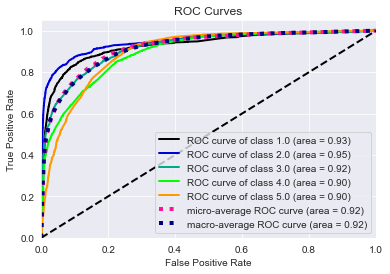

In [171]:
sktplt.metrics.plot_roc(y_test,rf_prob)

# Hyper Parameter Tuning

In [172]:
params = {'n_estimators':[400,500,600],'max_depth': [80,90,95],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [175]:
GridCV = GridSearchCV(RandomForestClassifier(),params,cv=5,n_jobs = -1,verbose = 1)

In [176]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 95],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 30],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [400, 500, 600]},
             verbose=1)

In [177]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 95,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [178]:
Best_model = RandomForestClassifier(n_estimators = 500,criterion = 'gini', max_depth= 95, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 2)
Best_model.fit(x_train,y_train)
rfpred = Best_model.predict(x_test)

In [179]:
acc = accuracy_score(y_test,rfpred)
conf_matrx = confusion_matrix(y_test,rfpred)

In [180]:
print('Accurcay:',acc*100)
print('Confusion Matrix:',conf_matrx)

Accurcay: 58.3157210209722
Confusion Matrix: [[1640  404  203   70  107]
 [ 455 1495  283  105   75]
 [ 265  267 1303  255  333]
 [ 122  114  391 1110  755]
 [ 110   40  339  435 1626]]


# Saving The Model

In [181]:
import joblib
joblib.dump(Best_model,"Ratingspredicts.pkl")

['Ratingspredicts.pkl']

# Loading The Model

In [182]:
mod = joblib.load("Ratingspredicts.pkl") 

In [183]:
mod.predict(x_test)

array([3., 1., 5., ..., 5., 5., 2.])

In [185]:
Prediction = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y[0:12302]})
Prediction.head()

,Predictions,Actual Values
0,3.0,5.0
1,1.0,5.0
2,5.0,5.0
3,2.0,4.0
4,3.0,5.0
